# Домашнее задание

Математический анализ
69 баллов

**Задача 1** (14 баллов)

Найдите экстремумы функции:

$$
f(x, y, z)=2 x^3+2 x y+2 x z+y^2+z^2+2 y-8 .
$$

Распишите подробное решение.

In [2]:
import numpy as np
import pandas as pd
import sympy as sp
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
import matplotlib.pyplot as plt
import statsmodels.api as sm
import seaborn as sns


# Подробное решение.
### Частные производные.
* $ df/dx = 6x^2 + 2y + 2z $
* $ df/dy = 2x + 2y + 2 $
* $ df/dz = 2x + 2z $

###  Cистемa уравнений.
* Уравнение 1: $ 6x^2 + 2y + 2z = 0 $
* Уравнение 2: $ 2x + 2y + 2 = 0$
* Уравнение 3: $ 2x + 2z = 0$

###  Решение системы уравнений.
* Из уравнения 2: $ y = -x-1  $, из уравнения 3: $ z = -x $
* Подставим $ y = -x-1 $ и $ z = -x $ в уравнение $ 6x^2 + 2y + 2z = 0 $ и решив квадратное уравнение, получим: $ (x_1 = 1)
(x_2 =  -0.33) $
* Соответственно, подставив значения $x$ в $ y = -x-1 $ и $ z = -x $, находим: $x_1, y_1, z_1 = (1, -2, -1)$, $x_2, y_2, z_2 = (-1/3, -2/3, 1/3) $

## Анализ второго порядка.
###  Вторые производные.
* $ d^2f/dx^2 = 12x $
* $ d^2f/dy^2 = 2 $
* $ d^2f/dz^2 = 2 $
* $ d^2f/dxdy = d^2f/dydx = 2 $
* $ d^2f/dxdz = d^2f/dzdx =2 $
* $ d^2f/dzdy = d^2f/dydz =0 $

###  Матрица Гессе.
* $ (12x, 2, 2) $
* $ ( 2, 2, 0) $
* $ ( 2, 0, 2) $

###  Расчет определителя и собственных значений матрицы Гессе для точек $(-1/3, -2/3, 1/3)$ и $(1, -2, -1)$.
* Расчет представлен ниже в Python
* В точке $(-1/3, -2/3, 1/3)$ определитель матрицы $ -32 $, собственные значения: $[-5.12, 3.12, 2.00]$
* В точке $(1, -2, -1)$ определитель матрицы $ 32 $, собственные значения: $[12.74, 1.26,  2.00] $

## Запись результата и выводов
* Вывод для $(-1/3, -2/3, 1/3)$. В данной области матрица Гессе отрицательно определена, одно из собственных значений отрицательно, т.e. эта критическая точка является седловой и не является экстремумом.
* Вывод для $(1, -2, -1)$. В данной области матрица Гессе положительно определена, все собственне значения положительны, т.e. эта критическая точка является экстремумом (локальным минимумом).
* ОТВЕТ: Экстремум данной функции: $(1, -2, -1)$

In [2]:
# Определитель и собственные значения для точки (−1/3,−2/3,1/3)
x_crit1 = -1/3
H = np.array([[12 * x_crit1, 2, 2],
              [2, 2, 0],
              [2, 0, 2]])
det_H = np.linalg.det(H)
eigenvalues = np.linalg.eigvals(H)
print(f"Матрица Гессе для x = {x_crit1}:\n{H}")
print("Определитель матрицы Гессе:", det_H)
print("Собственные значения:", eigenvalues)

# Определитель и собственные значения для точки (−1/3,−2/3,1/3)
x_crit2 = 1
H = np.array([[12 * x_crit2, 2, 2],
              [2, 2, 0],
              [2, 0, 2]])
det_H = np.linalg.det(H)
eigenvalues = np.linalg.eigvals(H)
print(f"\nМатрица Гессе для x = {x_crit2}:\n{H}")
print("Определитель матрицы Гессе:", det_H)
print("Собственные значения:", eigenvalues)

Матрица Гессе для x = -0.3333333333333333:
[[-4.  2.  2.]
 [ 2.  2.  0.]
 [ 2.  0.  2.]]
Определитель матрицы Гессе: -32.0
Собственные значения: [-5.12310563  3.12310563  2.        ]

Матрица Гессе для x = 1:
[[12  2  2]
 [ 2  2  0]
 [ 2  0  2]]
Определитель матрицы Гессе: 32.000000000000014
Собственные значения: [12.74456265  1.25543735  2.        ]


**Задача 2** (25 баллов)

Найдите условные экстремумы функции:

$
f(x, y)=4 x+8 y, y^2-2 x y+5=0
$

Вычислите результат самостоятельно (вручную) и с помощью Python. Сравните результаты.

# Решение вручную.
## Функция множителей Лагранжа
* $ L(x,y,lambda) = (4x + 8y) + lambda*(y^2 - 2xy + 5) $

## Частные производные.
* $ dL/dx = 4 - 2lambda*y $
* $ dL/dy = 8 + lambda(2y - 2x) $
* $ dL/dlambdа = y^2 - 2xy + 5 $

## Cистемa уравнений.
* Уравнение 1: $ 4-2lambda*y = 0 $
* Уравнение 2: $ 8+lambda(2y - 2x) = 0$
* Уравнение 3: $ y^2-2xy+5 = 0$

## Решение системы уравнений.
* Из уравнения 1: $ lambda = 2/y $, подставим в уравнение 2 и полуим $ x = 3y $
* Подставим $ x = 3y $ в уравнение $ y^2 - 2xy + 5 = 0 $ и решив квадратное уравнение, полуим: $ y = +-1 $
* Соответственно, подставив значения $y$ в $ x = 3y $, находим $x = 3$ при $y = 1$, $x = -3$ при $y = -1$
* Соответственно, подставив значения $x$ и $y$ в уравнение 2, находим $lambda = 2$ при $x, y = (3, 1)$, $lambda = -2$ при $x, y = (-3, -1)$

## Ответ
* Условные экстремумы функции: $(-3,-1)$, $(3, 1)$

 # Реализация вычислений с помощью Python.

In [3]:
x, y, lambda_ = sp.symbols('x y lambda')
f = 4*x + 8*y
g = y**2 - 2*x*y + 5

# Функция множителей Лагранжа
L = f + lambda_ * g

# Частные производные
dL_dx = sp.diff(L, x)
dL_dy = sp.diff(L, y)
dL_dlambda = sp.diff(L, lambda_)

# Решение системы уравнений
otvet = sp.solve([dL_dx, dL_dy, g], (x, y, lambda_))

# Ответ
print(otvet)

[(-3, -1, -2), (3, 1, 2)]


## Сравнение результатов
* Результаты вычисления условных экстремумов представленной функции вручную и  помощью Python совпали.
* Условные экстремумы функции: $(-3,-1)$, $(3, 1)$
## Формулирование итоговых выводов
* Условные экстремумы функции: $(-3,-1)$, $(3, 1)$
* Вычисление с помощью Python экономит значительное количество времени для расчета.

**Задача 3** (30 баллов)

Вам предложены данные с информацией о успеваемости студентов:

Независимые переменные:
* Hours Studied: Общее количество часов, потраченных на учебу каждым студентом.
* Previous Scores: Баллы, полученные студентами на предыдущих экзаменах.
* Sleep Hours: Среднее количество часов сна студента в сутки.
* Sample Question Papers Practiced: Количество пробных экзаменационных работ, с которыми студент занимался.
  
Целевая переменная:
* Performance Index: Показатель общей успеваемости каждого студента. Индекс успеваемости отражает академическую успеваемость студента и округляется до ближайшего целого числа. Индекс варьируется от 10 до 100, при этом более высокие значения свидетельствуют о более высокой успеваемости.

**Решите задачу линейной регрессии, реализовав градиентный спуск самостоятельно, не используя готовое решение из какой-либо библиотеки.**

   Hours Studied  Previous Scores Extracurricular Activities  Sleep Hours  \
0              7               99                        Yes            9   
1              4               82                         No            4   
2              8               51                        Yes            7   
3              5               52                        Yes            5   
4              7               75                         No            8   

   Sample Question Papers Practiced  Performance Index  
0                                 1               91.0  
1                                 2               65.0  
2                                 2               45.0  
3                                 2               36.0  
4                                 5               66.0  
В данных нет пропусков.
       Hours Studied  Previous Scores   Sleep Hours  \
count   10000.000000     10000.000000  10000.000000   
mean        4.992900        69.445700      6.530600   
std   

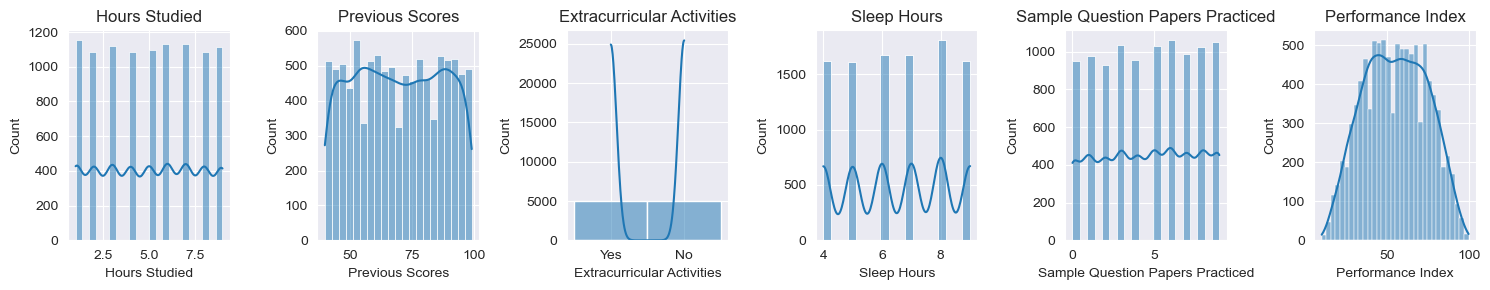

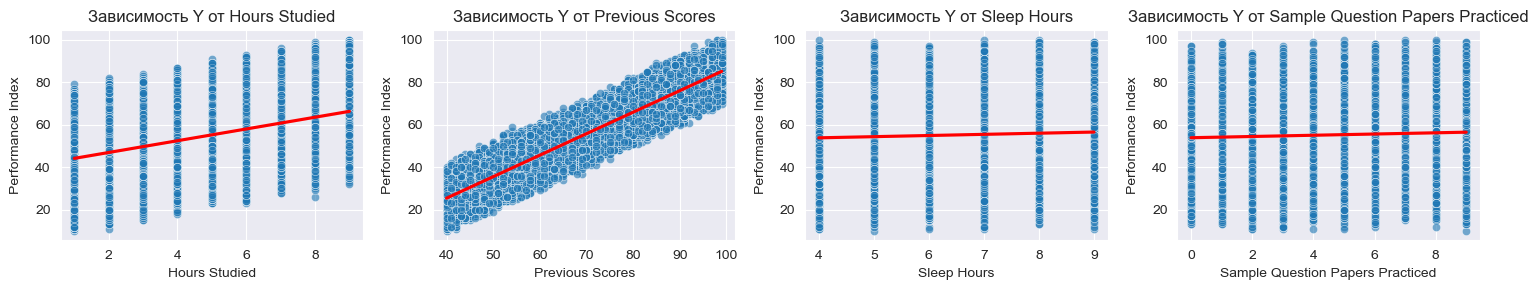

In [4]:
# Сбор и предобработка данных
df = pd.read_csv('data/Student_Performance.csv')

print(df.head())

# Проверка на пропуски
if df.isnull().sum().sum() > 0:
    print("В данных есть пропуски:")
    print(df.isnull().sum())  # Вывод количества пропусков по каждому столбцу
else:
    print("В данных нет пропусков.")

# Статистический анализ
print(df.describe())

## Смотрим диаграммы данных
plt.figure(figsize=(15, 3))
for i, column in enumerate(df.columns):
    plt.subplot(1, 6, i + 1)
    sns.histplot(df[column], kde=True)
    plt.title(column)
plt.tight_layout()
plt.show()

# 1. Формализация задачи линейной регрессии
## Подготовка данных
X_pre = df[['Hours Studied', 'Previous Scores', 'Sleep Hours', 'Sample Question Papers Practiced']].values
y = df['Performance Index'].values.reshape(-1, 1)  # Преобразуем y в колонку
n = len(y)

# Построение диаграмм зависимости y от независимых переменных
plt.figure(figsize=(15, 3))
independent_vars = ['Hours Studied', 'Previous Scores', 'Sleep Hours', 'Sample Question Papers Practiced']
for i, var in enumerate(independent_vars):
    plt.subplot(1, 4, i + 1)
    sns.scatterplot(x=df[var], y=df['Performance Index'], alpha=0.6)  # Диаграмма рассеяния
    sns.regplot(x=df[var], y=df['Performance Index'], scatter=False, color='red')  # Линия регрессии
    plt.title(f'Зависимость Y от {var}')
    plt.xlabel(var)
    plt.ylabel('Performance Index')
plt.tight_layout()
plt.show()

## Применяем стандартизацию
scaler = StandardScaler()
X = scaler.fit_transform(X_pre)

## Добавление столбца единиц для свободного члена
X = np.append(np.ones((n, 1)), X, axis=1)

# 1. Формализация задачи линейной регрессии.
* Из данных исключим булево значение Extracurricular Activities.
* Остальные данные распределены равномерно.
* Previous Scores отличается от остальных данных на порядоп, поэтому воспользуемся StandardScaler для стандартизации данных.

In [5]:
par = np.zeros((X.shape[1], 1))

# 2. Реализация функции ошибок (потерь)
def cost_function(X, y , par):
    y_pred = np.dot(X, par)
    error = (y_pred - y)**2
    cost = 1/(n)*np.sum(error)
    return cost

# 3. Реализация градиентного спуска
def grad_d(X, y, par, alpha, iterations, eps=0.001):
    costs = []
    for i in range(iterations):
        y_pred = np.dot(X, par)
        der = np.dot (X.transpose(), (y_pred - y))
        par -= alpha * 1 / n * der
        costs.append(cost_function(X, y, par))
        # Добавили критерий остановки в алгоритм - длина вектора градиента меньше либо равна eps
        # Это случается, когда все компоненты вектора градиента близки к eps (почти 0)
        if np.linalg.norm(der) <= eps:
            # В случае выполнения критерия остановки алгоритм завершает работу
            break
    return par, costs

par_opt, costs_opt = grad_d(X, y, par, 0.00005, 500000)
print(par.round(4))

# Фунеция для расчета MAPE
def MAPE_func(y_true, y_pred):
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

# Анализ итоговой модели
y_pred_opt = np.dot(X, par_opt)
mape_opt = MAPE_func(y, y_pred_opt)
r2_opt = r2_score(y, y_pred_opt)

print(f'MAPE: {mape_opt.round(4)}%')
print(f'R2: {np.round(r2_opt*100, 4)}%')

[[55.2248]
 [ 7.388 ]
 [17.6646]
 [ 0.8078]
 [ 0.5597]]
MAPE: 3.4962%
R2: 98.8498%


# Анализ итоговой модели и коэффициентов регрессии
* Коэффициенты показывают, как изменение каждой из независимых переменных влияет на зависимую переменную — индекс общей успеваемости.
* Наибольшее влияние на индекс успеваемости оказывают оценки за предыдущие экзамены, на втором месте - часы учебы.
* Наименьшее влияние на результат оказывает количество пробных экзаменационных работ, которое делал студент.
* Увеличение предыдущих оценок на 1 балл приводит к увеличению индекса производительности на 17.6646 единиц, увеличение часов учебы на 1 час в среднем увеличивает индекс общей успеваемости на 7.388 единиц, при условии, что остальные переменные остаются постоянными.
* Получается, прав был вождь мирового пролетариата. "Учиться, учиться и, ещё раз, учиться!" (1924, газета «Пролетарская революция», В.И. Ленин)
# Предсказание и оценка точности модели
* MAPE: 3.4962% Средняя абсолютная процентная ошибка меньше 5%. Это говорит о хорошей точности модели.
* R2: 98.8498% Коэффициент детерминации близок к 99%. То есть 99% результатов модели обьясняетсяс независимыми перменными. Это хороший результат.
#Сравнение с библиотечными решениями Python (sklearn)
* В сравнении с библиотечными решениями градиентый спуск дал  одинаковые резкльтаты (таблица ниже) с точки зрения коэффициентов и точности модели.
#Выводы
* В работе разработана модель градиентного спуска с малой (меньше 5%) абсолютной процентной ошибкой и высоким коэффициентом детерминации. Коэффициенты модели совпали с коэффициентами библиотесного метода линейной регрессии.

ТАблица сравнения результатов ручного град. спуска и град. спуска выполненного через sklearn

        Параметры Градиентный спуск Использование sklearn
0  Свободный член           55.2248               55.2248
1         Коэфф 1             7.388                 7.388
2         Коэфф 2           17.6646               17.6646
3         Коэфф 3            0.8078                0.8078
4         Коэфф 4            0.5597                0.5597
5             R^2           98.8498               98.8498
6            MAPE            3.4962                3.4962


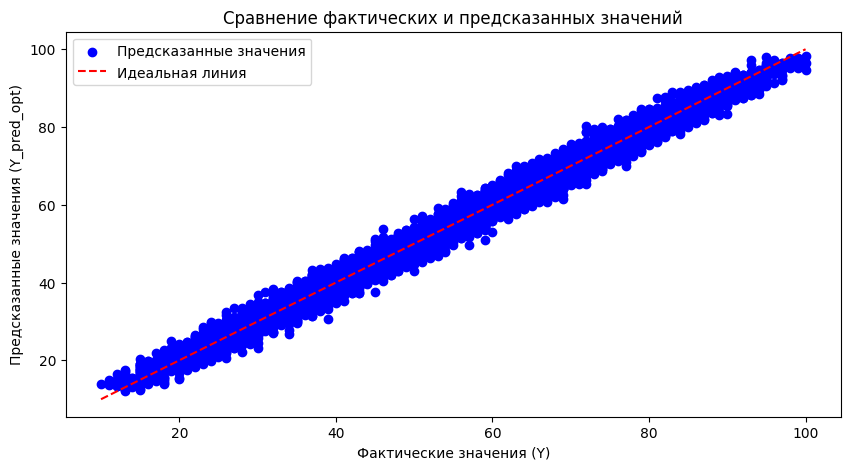

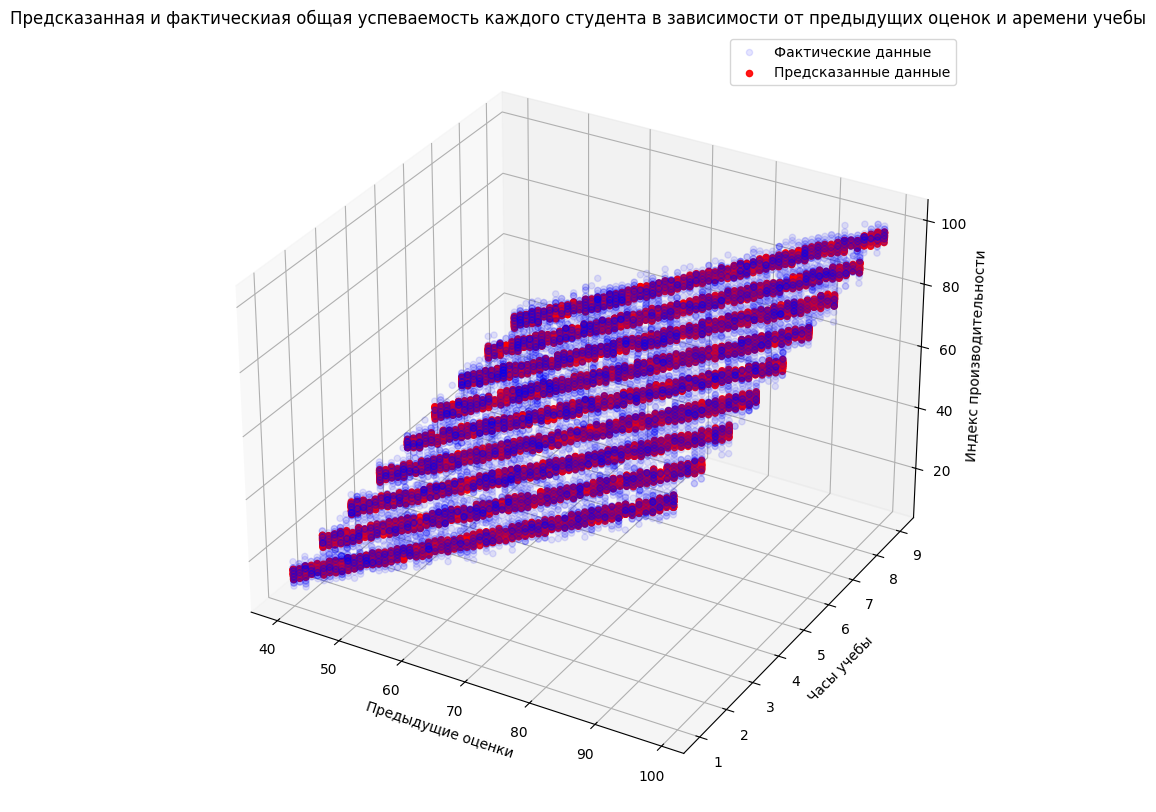

In [8]:
# Библиотечное решение (sklearn)
model = LinearRegression()
model.fit(X, y)
y_pred_sklearn = model.predict(X)
r2_sklearn = r2_score(y, y_pred_sklearn)
MAPE_sklearn = MAPE_func(y, y_pred_sklearn)

# Таблица для сравнения градиентного спуска и решения sklearn.
comparison_df = pd.DataFrame({
    'Параметры': ['Свободный член', 'Коэфф 1', 'Коэфф 2', 'Коэфф 3', 'Коэфф 4', 'R^2', 'MAPE'],
    'Градиентный спуск': [
        np.round(model.intercept_, 4),  # Свободный член
        np.round(model.coef_[0, 1], 4),     # Коэфф 1
        np.round(model.coef_[0, 2], 4),     # Коэфф 2
        np.round(model.coef_[0, 3], 4),     # Коэфф 3
        np.round(model.coef_[0, 4], 4),     # Коэфф 4
        np.round(r2_opt * 100, 4),       # R^2
        np.round(mape_opt, 4)                 # MAPE
    ],
    'Использование sklearn': [
        np.round(par[0], 4),             # Свободный член
        np.round(par[1], 4),             # Коэфф 1
        np.round(par[2], 4),             # Коэфф 2
        np.round(par[3], 4),             # Коэфф 3
        np.round(par[4], 4),             # Коэфф 4
        np.round(r2_sklearn * 100, 4),   # R^2
        np.round(MAPE_sklearn, 4)        # MAPE
    ]
})

comparison_df['Градиентный спуск'] = comparison_df['Градиентный спуск'].astype(str).str.replace('[', '').str.replace(']', '')
comparison_df['Использование sklearn'] = comparison_df['Использование sklearn'].astype(str).str.replace('[', '').str.replace(']', '')

print(f'ТАблица сравнения результатов ручного град. спуска и град. спуска выполненного через sklearn\n\n{comparison_df}')

# График сравнения Y и Y_pred_opt
plt.figure(figsize=(10, 5))
plt.scatter(y, y_pred_opt, color='blue', label='Предсказанные значения')
plt.plot([y.min(), y.max()], [y.min(), y.max()], color='red', linestyle='--', label='Идеальная линия')
plt.title('Сравнение фактических и предсказанных значений')
plt.xlabel('Фактические значения (Y)')
plt.ylabel('Предсказанные значения (Y_pred_opt)')
plt.legend()
plt.show()

from mpl_toolkits.mplot3d import Axes3D
# Построение 3D графика
fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(111, projection='3d')

# Отображение фактических данных
ax.scatter(X_pre[:, 1], X_pre[:, 0], y, color='b', label='Фактические данные', alpha=0.1)

# Отображение предсказанных данных
ax.scatter(X_pre[:, 1], X_pre[:, 0], y_pred_opt, color='r', label='Предсказанные данные', alpha=0.9)

# Настройка графика
ax.set_xlabel('Предыдущие оценки')
ax.set_ylabel('Часы учебы')
ax.set_zlabel('Индекс производительности')
ax.set_title('Предсказанная и фактическиая общая успеваемость каждого студента в зависимости от предыдущих оценок и аремени учебы')
ax.legend()

plt.show()